This is a demo of how we can add catalog simulations to LSST alerts in avro forma, which the Rubin project is using. 

Follow the README of this repository and then the README of `alert_packet` for setup. This involves installing `alert_packet` in some way.

This notebook is based on the examples and codes in `alert_packet` :https://github.com/lsst/alert_packet

In [1]:
import lsst.alert.packet

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
import json
import pandas as pd
from astropy.io import fits
import numpy as np
from astropy.time import Time

In [4]:
schema = lsst.alert.packet.Schema.from_file()

If you clone the repository `alert_packet` this is the location of the alert.json file.

In [5]:
path = Path('../../alert_packet/python/lsst/alert/packet/schema/4/0/sample_data/')
with open(path/'alert.json') as f:
    alert_data = json.load(f)

In [6]:
alert_data['diaSource']

{'diaSourceId': 281323062375219200,
 'ccdVisitId': 111111,
 'midPointTai': 1480360995,
 'filterName': 'r',
 'programId': 1,
 'ra': 351.570546978,
 'decl': 0.126243049656,
 'raSigma': 0.00028,
 'declSigma': 0.00028,
 'ra_decl_Cov': 0.00029,
 'x': 112.1,
 'y': 121.1,
 'xSigma': 1.2,
 'ySigma': 1.1,
 'x_y_Cov': 1.2,
 'apFlux': 1241.0,
 'apFluxErr': 12.0,
 'snr': 41.1,
 'psFlux': 1241.0,
 'psFluxErr': 12.0,
 'flags': 0}

In [7]:
alert_data['prvDiaSources']

[{'diaSourceId': 281323062375219198,
  'ccdVisitId': 111111,
  'midPointTai': 1480360995,
  'filterName': 'r',
  'programId': 1,
  'ra': 351.570546978,
  'decl': 0.126243049656,
  'raSigma': 0.00028,
  'declSigma': 0.00028,
  'ra_decl_Cov': 0.00029,
  'x': 112.1,
  'y': 121.1,
  'xSigma': 1.2,
  'ySigma': 1.1,
  'x_y_Cov': 1.2,
  'apFlux': 1241.0,
  'apFluxErr': 12.0,
  'snr': 41.1,
  'psFlux': 1241.0,
  'psFluxErr': 12.0,
  'flags': 0},
 {'diaSourceId': 281323062375219199,
  'ccdVisitId': 111111,
  'midPointTai': 1480360995,
  'filterName': 'r',
  'programId': 1,
  'ra': 351.570546978,
  'decl': 0.126243049656,
  'raSigma': 0.00028,
  'declSigma': 0.00028,
  'ra_decl_Cov': 0.00029,
  'x': 112.1,
  'y': 121.1,
  'xSigma': 1.2,
  'ySigma': 1.1,
  'x_y_Cov': 1.2,
  'apFlux': 1241.0,
  'apFluxErr': 12.0,
  'snr': 41.1,
  'psFlux': 1241.0,
  'psFluxErr': 12.0,
  'flags': 0}]

## What does the data corresponding to a diasrc look like? 

This is just a dictionary: You can write some code to read the data from SNANA and write it to the values of the correct keys

In [8]:
diasrc = alert_data['prvDiaSources'][0]

In [9]:
from copy import copy

## Taking an SNANA file and porting information to alert
Example:

In [42]:
simdir='/global/cscratch1/sd/kessler/SNANA_LSST_SIM/GSN_LSST_DDF/'
list = ['MODEL42_SNIIn','MODEL67_SNIa-91bg']
modelname = ['GSN_LSST_DDF_%s'%i for i in list]



['GSN_LSST_DDF_MODEL42_SNIIn', 'GSN_LSST_DDF_MODEL67_SNIa-91bg']


TypeError: can only concatenate str (not "list") to str

ColDefs(
    name = 'MJD'; format = '1D'
    name = 'BAND'; format = '2A'
    name = 'CCDNUM'; format = '1I'
    name = 'FIELD'; format = '12A'
    name = 'PHOTFLAG'; format = '1J'
    name = 'PHOTPROB'; format = '1E'
    name = 'FLUXCAL'; format = '1E'
    name = 'FLUXCALERR'; format = '1E'
    name = 'PSF_SIG1'; format = '1E'
    name = 'PSF_SIG2'; format = '1E'
    name = 'PSF_RATIO'; format = '1E'
    name = 'SKY_SIG'; format = '1E'
    name = 'SKY_SIG_T'; format = '1E'
    name = 'RDNOISE'; format = '1E'
    name = 'ZEROPT'; format = '1E'
    name = 'ZEROPT_ERR'; format = '1E'
    name = 'GAIN'; format = '1E'
    name = 'SIM_MAGOBS'; format = '1E'
    name = 'SIM_FLUXCAL_HOSTERR'; format = '1E'
)
ColDefs(
    name = 'MJD'; format = '1D'
    name = 'BAND'; format = '2A'
    name = 'CCDNUM'; format = '1I'
    name = 'FIELD'; format = '12A'
    name = 'PHOTFLAG'; format = '1J'
    name = 'PHOTPROB'; format = '1E'
    name = 'FLUXCAL'; format = '1E'
    name = 'FLUXCALERR'; format = '

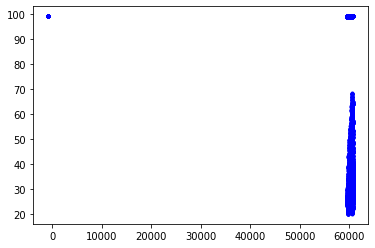

In [45]:
for name in modelname:
    name_head=simdir+name+'/'+'GSN_LSST_DDF_NONIaMODEL0-0001_HEAD.FITS.gz'

    name_phot=simdir+name+'/'+'GSN_LSST_DDF_NONIaMODEL0-0001_PHOT.FITS.gz'
    head = fits.open(name_head)
    #print(head[1].data)
    phot = fits.open(name_phot)
    #print(phot[1].data)
    phot_cols=phot[1].columns
    print(phot_cols)

    mjd = phot[1].data['MJD']
    mag = phot[1].data['SIM_MAGOBS']
    plt.plot(mjd, mag,'.', color='b')
#     plt.axis([59582.3282,59582.3282+399, 0,60])
#     print(mjd)
    bound = np.where(mjd==-777)[0][0]
    filt = phot[1].data['BAND'][0:bound]
    mag = phot[1].data['SIM_MAGOBS'][0:bound]
    ginds = np.where(phot[1].data['BAND'][0:bound]=='g')
    zinds = np.where(phot[1].data['BAND'][0:bound]=='z')
    fluxcal =  phot[1].data['FLUXCAL'][0:bound]
    fluxcalerr =  phot[1].data['FLUXCALERR'][0:bound]
    snr = fluxcal/fluxcalerr
    mjd=mjd[0:bound]

(array([  6,  11,  16,  21,  26,  32,  37,  42,  47,  52,  58,  63,  68,
        73,  81,  86,  91,  97, 102, 107, 112, 120, 125, 130, 138, 143,
       148, 160, 165, 171, 176, 181, 186, 191, 196, 201, 206, 211, 219,
       224, 229, 234, 239, 244, 249]),)


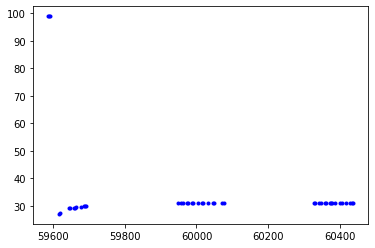

In [19]:
plt.plot(mjd[ginds], mag[ginds],'.', color='b')
print(ginds)
path = Path('../../alert_packet/python/lsst/alert/packet/schema/4/0/sample_data/')
with open(path/'alert.json') as f:
    alert_data_orig = json.load(f)
alert = copy(alert_data_orig)

Copying over the original schema to a 'blank' alert

In [20]:
diasrc = alert_data_orig['prvDiaSources'][0]
my_diasrc = copy(diasrc)
alert = copy(alert_data_orig)
print(alert['prvDiaSources'])
alert['prvDiaSources'].clear()
print(alert['prvDiaSources'])


[{'diaSourceId': 281323062375219198, 'ccdVisitId': 111111, 'midPointTai': 1480360995, 'filterName': 'r', 'programId': 1, 'ra': 351.570546978, 'decl': 0.126243049656, 'raSigma': 0.00028, 'declSigma': 0.00028, 'ra_decl_Cov': 0.00029, 'x': 112.1, 'y': 121.1, 'xSigma': 1.2, 'ySigma': 1.1, 'x_y_Cov': 1.2, 'apFlux': 1241.0, 'apFluxErr': 12.0, 'snr': 41.1, 'psFlux': 1241.0, 'psFluxErr': 12.0, 'flags': 0}, {'diaSourceId': 281323062375219199, 'ccdVisitId': 111111, 'midPointTai': 1480360995, 'filterName': 'r', 'programId': 1, 'ra': 351.570546978, 'decl': 0.126243049656, 'raSigma': 0.00028, 'declSigma': 0.00028, 'ra_decl_Cov': 0.00029, 'x': 112.1, 'y': 121.1, 'xSigma': 1.2, 'ySigma': 1.1, 'x_y_Cov': 1.2, 'apFlux': 1241.0, 'apFluxErr': 12.0, 'snr': 41.1, 'psFlux': 1241.0, 'psFluxErr': 12.0, 'flags': 0}]
[]


In [33]:
my_diasrc['diaSourceId'] = 281323062375219198
my_diasrc['midPointTai'] = mjd[0]
my_diasrc['filterName'] = filt[0]
my_diasrc['snr'] = snr[0]
my_diasrc['apFlux'] = fluxcal[0]
my_diasrc['apFluxErr'] = fluxcalerr[0]
alert['diaSource'] = my_diasrc

print('-------')
for count, i in enumerate(ginds[0]):
    #print(count,i)
    my_diasrc = copy(diasrc)
    my_diasrc['diaSourceId'] = my_diasrc['diaSourceId']+count+1
    my_diasrc['midPointTai'] = mjd[i]
    my_diasrc['filterName'] = filt[i]
    my_diasrc['snr'] = snr[i]
    my_diasrc['apFlux'] = fluxcal[i]
    my_diasrc['apFluxErr'] = fluxcalerr[i]
  
    alert['prvDiaSources'].append(alert['diaSource'])
    #print(alert['prvDiaSources'])
    #print('*******')
    alert['diaSource'] = my_diasrc
    #print(alert['diaSource'])
    
print('====')   
#alert['prvDiaSources']

-------
====


In [34]:
alert['diaSource']

{'diaSourceId': 281323062375219243,
 'ccdVisitId': 111111,
 'midPointTai': 60433.9929,
 'filterName': 'g',
 'programId': 1,
 'ra': 351.570546978,
 'decl': 0.126243049656,
 'raSigma': 0.00028,
 'declSigma': 0.00028,
 'ra_decl_Cov': 0.00029,
 'x': 112.1,
 'y': 121.1,
 'xSigma': 1.2,
 'ySigma': 1.1,
 'x_y_Cov': 1.2,
 'apFlux': -2.287318,
 'apFluxErr': 0.79078186,
 'snr': -2.8924766,
 'psFlux': 1241.0,
 'psFluxErr': 12.0,
 'flags': 0}

## Converting to efficient avro format
Now with the entire `alert_data` file, we have

In [36]:
avro_bytes = schema.serialize(alert)
messg = schema.deserialize(avro_bytes)
iterNum=0
with open("plasticcAlert_%s_%i.avro"%(modelname,iterNum), "wb") as f:
    schema.store_alerts(f, [alert])

## Plot from the schema
Taken from the ztf code https://github.com/ZwickyTransientFacility/ztf-avro-alert/blob/master/notebooks/Working_with_avro_files.ipynb

In [23]:
def make_dataframe(packet):
    df = pd.DataFrame(packet['diaSource'], index=[0])
    df_prv = pd.DataFrame(packet['prvDiaSources'])
    return pd.concat([df,df_prv], ignore_index=True)

def plot_lightcurve(dflc, days_ago=True):
    
    filter_color = {'g':'green', 'r':'red', 'u':'pink'}
    if days_ago:
        now = Time.now().jd
        t = dflc.midPointTai - now
        xlabel = 'Days Ago'
    else:
        t = dflc.midPointTai
        xlabel = 'Time (JD)'
    
    plt.figure()
    for fid, color in filter_color.items():
        # plot detections in this filter:
        w = (dflc.filterName == fid) & ~dflc.psFlux.isnull()
        if np.sum(w):
            plt.errorbar(t[w],dflc.loc[w,'apFlux'], dflc.loc[w,'apFluxErr'],fmt='.',color=color)
        #wnodet = (dflc.fid == fid) & dflc.magpsf.isnull()
        #if np.sum(wnodet):
         #   plt.scatter(t[wnodet],dflc.loc[wnodet,'diffmaglim'], marker='v',color=color,alpha=0.25)
    
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.ylabel('Magnitude')

In [25]:
dflc = make_dataframe(alert)
#dflc

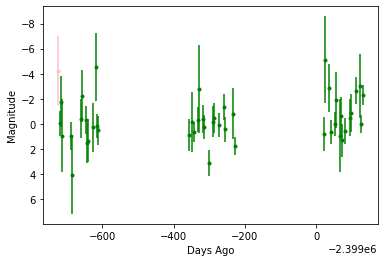

In [26]:
plot_lightcurve(dflc)